In [2]:
import pandas as pd
import re, os
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

df = pd.read_csv("~/Desktop/CompAnalysis/FinalProject/oneHotDfAllCols.csv")


In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

us_states = gpd.read_file('~/Desktop/CompAnalysis/FinalProject/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')

#us_states = gpd.read_file('~/Desktop/CompAnalysis/FinalProject/cb_2018_us_state_5m/cb_2018_us_state_5m.shp')

us_statesSortedGEOID = us_states.sort_values('GEOID')

In [4]:

#get ride of PR
us_statesSortedGEOID = us_statesSortedGEOID.drop(7,axis=0)

#get rid oh AK
us_statesSortedGEOID = us_statesSortedGEOID.drop(25,axis=0)



In [5]:
#make data for just drugs 
#missing data for some states and need to get rid of DC
#missing for DE(10), ID(16), Maryland(24), NJ(34), NM (35), OR (41), VT(50)
stateMurder = {}

for index, row in df.iterrows():
     if row['murder'] == 1:
          if row['STATE'] in stateMurder:
               stateMurder[row['STATE']].append(row['SENTLGTH'])
               #print()
          else:
               stateMurder[row['STATE']] = [row['SENTLGTH']]  


print(stateMurder)






{1: [5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 2, 2, 2, 2, 4, 4, 4, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 4, 5, 4, 4, 5, 5, 5, 5, 4, 5, 5, 4, 5, 2, 5, 5, 2, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 4, 4, 4, 5, 4, 5, 5, 4, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 4, 5, 4, 5, 5, 6, 6, 6, 6, 6, 4, 6, 6, 4, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 4, 4, 6, 4, 5, 6, 5, 5, 6, 5, 5, 5, 4, 5, 5, 6, 0, 4, 6, 6, 4, 5, 6, 4, 4, 5, 4, 4, 6, 5, 6, 6, 4, 5, 5, 5, 4, 6, 6, 5, 4, 6, 4, 6, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 2, 2, 2, 2, 2, 5, 2, 5, 4, 5, 6, 6, 5, 5, 6, 5, 0, 1, 0, 1, 6, 4, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 5, 6, 6, 6, 6, 4, 6, 6, 6, 5, 6, 6, 6, 4, 6, 5, 6, 6, 6, 5, 4, 5, 6, 6, 6, 5, 5, 4, 6, 6, 6, 5, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 4, 6, 4, 6, 4, 4, 4, 6, 5, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 5, 2, 4, 4, 4, 4, 4, 5, 4, 5, 2, 2, 4, 2, 5, 2, 2, 5, 6, 5, 5, 2, 0, 0, 1, 4, 4, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6,

In [6]:
#make data for Murder map
stateMurderFinal = {2:0, 10: 0 , 16: 0, 24: 0, 34:0, 35: 0, 41: 0, 50:0}
for state in stateMurder.keys():
   valueList = stateMurder[state]
   average =  sum(valueList)/len(valueList)
   roundedAverage = np.round(average, decimals=0)
   stateMurderFinal[state] = roundedAverage

dfStateMurder = pd.DataFrame(stateMurderFinal.items(), columns=['GEOID', 'sentenceLen'])

dfStateMurder['GEOID'] = dfStateMurder['GEOID'].astype('object')
dfStateMurder['sentenceLen'] = dfStateMurder['sentenceLen'].astype(int)

dfStateMurderSorted = dfStateMurder.sort_values('GEOID')


sentenceLenListMurder = []

for index, row in dfStateMurderSorted.iterrows():
   sentenceLenListMurder.append(row['sentenceLen'])

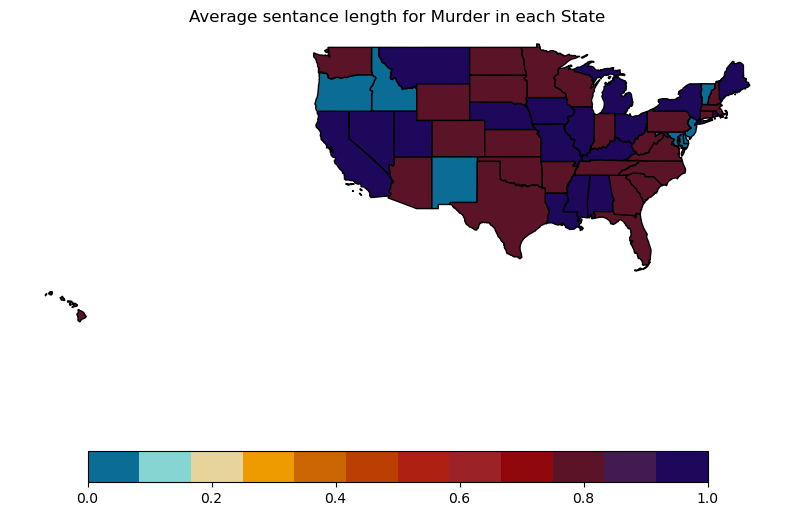

In [13]:
us_statesSortedGEOID['sentenceLen'] = sentenceLenListMurder [:1] + sentenceLenListMurder[2:]

from matplotlib.colors import ListedColormap


# Define custom colormap
cmap = ListedColormap(['#0b6c96', '#87d5d2', '#e7d49b', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226', '#91080c', '#5b1427', '#431a51', '#1d085b'])

#make plot
fig, ax = plt.subplots(figsize=(10, 10))
us_statesSortedGEOID.plot(ax=ax, column='sentenceLen', cmap=cmap, edgecolor='black') 
ax.set_title('Average sentance length for Murder in each State')
sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.8) #, ticks = [1,2,3,4,5])
ax.set_axis_off()

plt.show()
